In [111]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
#from dython.nominal import associations <This is to create a corelation matrix, i'll need to uise pip install
import matplotlib.pyplot as plt

In [184]:
filepath = r'C:\Users\Administrator\Documents\Grad School\Statistics & Machine Learning\Discusion Task Week 4\Banking_loss_events.xlsx'
data_df = pd.read_excel(filepath, sheet_name="Loss Events")

#Create columns into categories
data_df['Region'] = data_df['Region'].astype('category')
data_df['Business'] = data_df['Business'].astype('category')
data_df['Status'] = data_df['Status'].astype('category')
data_df['Risk Category'] = data_df['Risk Category'].astype('category')
data_df['Risk Sub-Category'] = data_df['Risk Sub-Category'].astype('category')
data_df['Year'] = data_df['Year'].astype('category')
# Add some categorical columns for our datebase. 

data_df['Recovery_Amount_category'] = ['low' if x<25 else 'medium' if 25<=x<32 else 'high' for x in data_df['Recovery Amount (percent)']]
data_df['Recovery_Amount_category'] = data_df['Recovery_Amount_category'].astype('category')

In [185]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Region                     1402 non-null   category      
 1   Business                   1402 non-null   category      
 2   Name                       1402 non-null   object        
 3   Status                     1402 non-null   category      
 4   Risk Category              1402 non-null   category      
 5   Risk Sub-Category          1402 non-null   category      
 6   Discovery Date             1402 non-null   datetime64[ns]
 7   Occurrence Start Date      1402 non-null   datetime64[ns]
 8   Year                       1402 non-null   category      
 9   Net Loss                   1402 non-null   float64       
 10  Recovery Amount            1402 non-null   float64       
 11  Estimated Gross Loss       1402 non-null   int64         
 12  Recove

In [115]:
chisqt = pd.crosstab(data_df['Region'], data_df['Risk Category'], margins=True)
print(chisqt)

Risk Category  Business Disruption and System Failures  \
Region                                                   
Asia Pac                                             4   
EMEA                                                 6   
North America                                       14   
All                                                 24   

Risk Category  Clients, Products and Business Practices  \
Region                                                    
Asia Pac                                             22   
EMEA                                                 32   
North America                                        46   
All                                                 100   

Risk Category  Damage to Physical Assets  \
Region                                     
Asia Pac                               2   
EMEA                                   4   
North America                          4   
All                                   10   

Risk Category  Employment Pract

In [48]:
value = np.array([chisqt.iloc[0][0:8].values, #8 is the number of indpendent categories for the second item, Rsik catertgory
                  chisqt.iloc[1][0:8].values,
                chisqt.iloc[2][0:8].values,
                chisqt.iloc[3][0:8].values,])
#8 is the number of indpendent categories for the second item, Rsik catertgory
#there are 4 items, becouse that the cetgories for 1st value, Region
print(value)

[[   4   22    2   24  122  120   10  304]
 [   6   32    4   38  174  186   16  456]
 [  14   46    4   50  236  266   26  642]
 [  24  100   10  112  532  572   52 1402]]


In [88]:
print(chi2_contingency(value)[0:3]) 
#the first is the statistical value
#the second value is the p-value,  
#and third spot is the degree of freedom. 

(3.111204932865107, 0.9999978810081662, 21)


From this, there is not any statisitical sigifficance from Region compared to Risk Category
and that was supper Tedius. So i'm just going to loop through the other possibilities with region being what we'll compare to the other categorical data

In [191]:
#first we need to find all the columns that are categories, I like this function becouse it's super scalable
list_category_columns = []
data = data_df.dtypes
for column in data_df:
    if data[column] == 'category':
        list_category_columns.append(column)
# list_category_columns will be our list of columns that are categorical      

In [187]:
prime_category = list_category_columns[0] #This will give us the first itme we will compare with the res
other_categories = list_category_columns[1:] #this will be all the other categories


In [188]:
for dependent_category in other_categories:
    num_of_categories = len(set(data_df[dependent_category].tolist())) + 1 #add another one to count for total row
    chisqt = pd.crosstab(data_df[prime_category], data_df[dependent_category], margins=True)
    value = np.array([chisqt.iloc[0][0:num_of_categories].values, 
                  chisqt.iloc[1][0:num_of_categories].values,
                chisqt.iloc[2][0:num_of_categories].values,
                chisqt.iloc[3][0:num_of_categories].values,])
    print(f'{prime_category} vs. {dependent_category}')
    print(chi2_contingency(value)[0:3])
     

Region vs. Business
(11.315722704379885, 0.9562801333162011, 21)
Region vs. Status
(193.3438273793515, 4.765741848646817e-33, 15)
Region vs. Risk Category
(3.111204932865107, 0.9999978810081662, 21)
Region vs. Risk Sub-Category
(59.75655752890681, 0.4845754036514422, 60)
Region vs. Year
(12.335795539694775, 0.9758540126480756, 24)
Region vs. Recovery_Amount_category
(1.7495641560229558, 0.9948376069293122, 9)


The First Value is the statitic, second value is the Pvalue and the third value is the degrees of freedom

Looking at this we can see that Region and status are statisitically significant with a Pvalue of 4.77E-33. Obioslty I could keep examining this. But the trickey part is in my prgram the number of lines in array section is dependent on number of categories for the dependnet variable. I'm sure there is an easy way to bipass this though. 



But going back to what we discovered, let's categoize this

In [119]:
region_v_status = data_df[['Region','Status']]
chisqt = pd.crosstab(region_v_status['Region'], region_v_status['Status'], margins=True)

In [157]:
chisqt

Status,Approved,In Progress,Not Started,Rejected,Under Review,All
Region,,,,,,
Asia Pac,41,50,64,93,56,304
EMEA,84,98,146,12,116,456
North America,120,96,220,36,170,642
All,245,244,430,141,342,1402


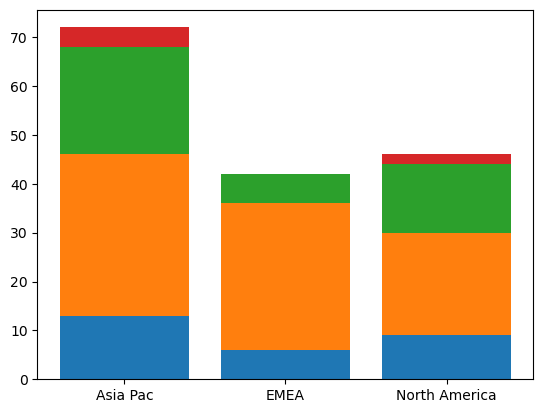

In [216]:
groups = data_df["Region"].cat.categories.tolist()
values = np.array([chisqt.iloc[0][0:5].values, #8 is the number of indpendent categories for the second item, Rsik catertgory
                  chisqt.iloc[1][0:5].values,
                chisqt.iloc[2][0:5].values,
                chisqt.iloc[3][0:5].values,])

values_transpose = np.transpose(values[0:3])#need to transpose our data for how we set this up

fig, ax = plt.subplots()
for i in range(values.shape[0]):
  ax.bar(groups, values_transpose[i], bottom = np.sum(values_transpose[:i], axis = 0))
#plt.show()

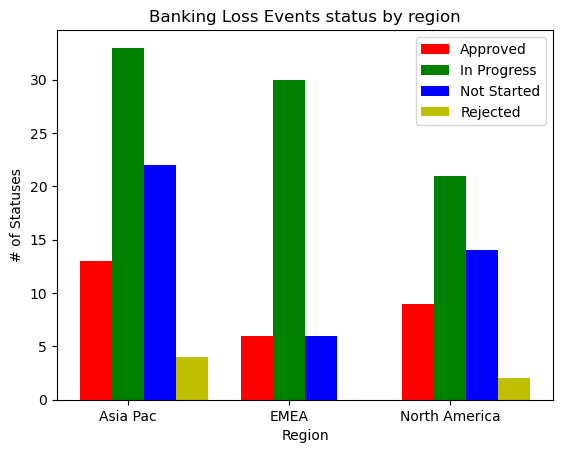

In [217]:
N = 3
ind = np.arange(N)  
width = 0.20
xvals = values_transpose[0] 
bar1 = plt.bar(ind, xvals, width, color = 'r') 
  
yvals = values_transpose[1] 
bar2 = plt.bar(ind+width, yvals, width, color='g') 
  
zvals = values_transpose[2]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b')

gvals = values_transpose[3]
bar4 = plt.bar(ind+width*3, gvals, width, color = 'y')

plt.xlabel("Region") 
plt.ylabel('# of Statuses') 
plt.title("Banking Loss Events status by region") 

plt.xticks(ind+width, data_df["Region"].cat.categories.tolist()) 
plt.legend( (bar1, bar2, bar3, bar4), data_df["Status"].cat.categories.tolist() ) 
plt.show()

In [196]:
#do this again, but look at our column we made:
prime_category = list_category_columns[-1] #take the last column we made
other_categories = list_category_columns[:-1]

In [197]:
other_categories

['Region', 'Business', 'Status', 'Risk Category', 'Risk Sub-Category', 'Year']

In [198]:
#run our for loop again
for dependent_category in other_categories:
    num_of_categories = len(set(data_df[dependent_category].tolist())) + 1 #add another one to count for total row
    chisqt = pd.crosstab(data_df[prime_category], data_df[dependent_category], margins=True)
    value = np.array([chisqt.iloc[0][0:num_of_categories].values, 
                  chisqt.iloc[1][0:num_of_categories].values,
                chisqt.iloc[2][0:num_of_categories].values,
                chisqt.iloc[3][0:num_of_categories].values,])
    print(f'{prime_category} vs. {dependent_category}')
    print(chi2_contingency(value)[0:3])

Recovery_Amount_category vs. Region
(1.7495641560229556, 0.9948376069293122, 9)
Recovery_Amount_category vs. Business
(17.95103310709353, 0.652100855460156, 21)
Recovery_Amount_category vs. Status
(7.7117281304950795, 0.9348191389651468, 15)
Recovery_Amount_category vs. Risk Category
(16.14525976746546, 0.7614347104564305, 21)
Recovery_Amount_category vs. Risk Sub-Category
(109.04570719042927, 0.00011178411509894039, 60)
Recovery_Amount_category vs. Year
(11.300463200684336, 0.9867029945846186, 24)


So there is a low Pvalue between Recovery ammount cattegory and Risk Sub Category. However. There is a large DF or degrees of freedom. so this will be hard to visuilize. 

In [ ]:
#create a new DF for the Values


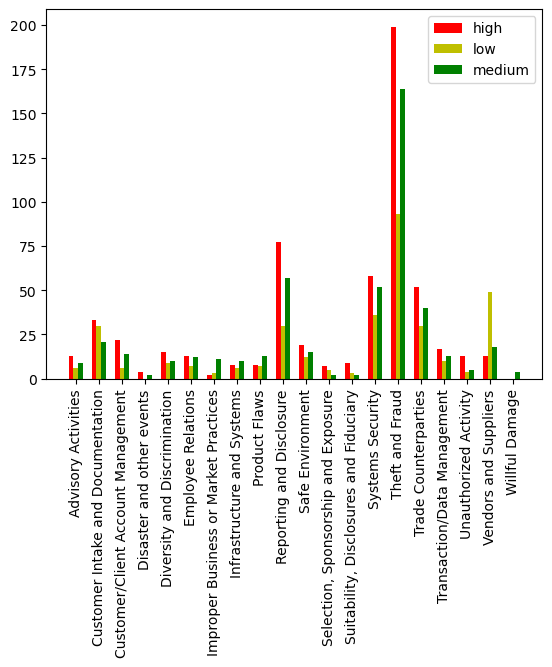

In [225]:
Risk_vs_RecoveryAmount = data_df[['Recovery_Amount_category','Risk Sub-Category']]
chisqt = pd.crosstab(Risk_vs_RecoveryAmount['Recovery_Amount_category'], Risk_vs_RecoveryAmount['Risk Sub-Category'], margins=True)
values = np.array([chisqt.iloc[0][0:20].values, #8 is the number of indpendent categories for the second item, Rsik catertgory
                  chisqt.iloc[1][0:20].values,
                chisqt.iloc[2][0:20].values,])
values_transpose = np.transpose(values[0:3])


N = 20
ind = np.arange(N)  
width = 0.20

xvals = values[0] 
bar1 = plt.bar(ind, xvals, width, color = 'r') 
  
yvals = values[1] 
bar2 = plt.bar(ind+width, yvals, width, color='y') 
  
zvals = values[2]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'g')

plt.xticks(ind+width, Risk_vs_RecoveryAmount['Risk Sub-Category'].cat.categories.tolist(),rotation='vertical') 
plt.legend( (bar1, bar2, bar3), Risk_vs_RecoveryAmount['Recovery_Amount_category'].cat.categories.tolist() ) 
plt.show()

From this, We can see better visulize how the risk sub factors can alter between low medium and high high Recovery amount. 